# 포켓몬 이미지 분류

1세대 ~ 7세대의 모든 포켓몬의 이미지와 유형(1차, 2차)을 포함하고 포켓몬의 진화 형태

- [데이터 출처 : Kaggle Pokemon Image Dataset](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 이미지 파일 압축 해제
!unzip pokemon.zip

Archive:  pokemon.zip
  inflating: images/images/abomasnow.png  
  inflating: images/images/abra.png  
  inflating: images/images/absol.png  
  inflating: images/images/accelgor.png  
  inflating: images/images/aegislash-blade.png  
  inflating: images/images/aerodactyl.png  
  inflating: images/images/aggron.png  
  inflating: images/images/aipom.png  
  inflating: images/images/alakazam.png  
  inflating: images/images/alomomola.png  
  inflating: images/images/altaria.png  
  inflating: images/images/amaura.png  
  inflating: images/images/ambipom.png  
  inflating: images/images/amoonguss.png  
  inflating: images/images/ampharos.png  
  inflating: images/images/anorith.png  
  inflating: images/images/araquanid.jpg  
  inflating: images/images/arbok.png  
  inflating: images/images/arcanine.png  
  inflating: images/images/arceus.png  
  inflating: images/images/archen.png  
  inflating: images/images/archeops.png  
  inflating: images/images/ariados.png  
  inflating: images/imag

In [ ]:
import glob
paths = glob.glob("images/images/*")
paths[:5]

['images/images/huntail.png',
 'images/images/comfey.jpg',
 'images/images/kangaskhan.png',
 'images/images/pikachu.png',
 'images/images/exeggutor.png']

In [ ]:
import os

for root, dirs, file in os.walk("images/images/"):
    print(root, dirs, len(file))

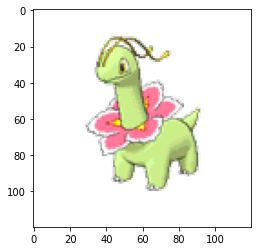

In [ ]:
# 이미지 미리보기
plt.imshow(plt.imread('images/images/meganium.png'));

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# pokemon = ImageDataGenerator(rescale=1/255.0)
# pokemon

In [ ]:
# 이미지 사이즈 설정
width = 32
height = 32

In [ ]:
len(paths)

809

In [ ]:
df = pd.read_csv('pokemon.csv')
print(df.shape)
df.head()

(809, 3)


,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    809 non-null    object
 1   Type1   809 non-null    object
 2   Type2   405 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


In [ ]:
df.describe()

,Name,Type1,Type2
count,809,809,405
unique,809,18,18
top,bulbasaur,Water,Flying
freq,1,114,95


In [ ]:
df.Type1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

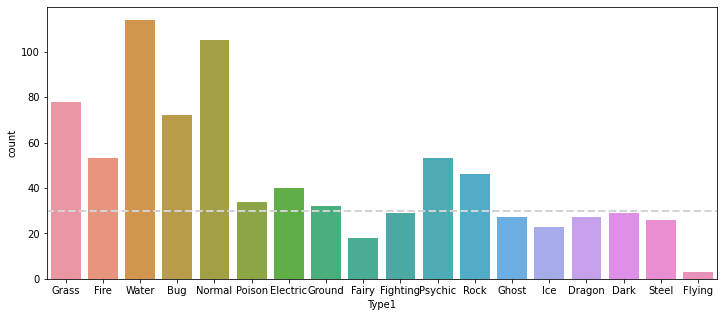

In [ ]:
plt.figure(figsize=(12, 5))
plt.axhline(30, color='lightgray', linestyle='--', linewidth=2)
sns.countplot(x=df["Type1"]);

In [ ]:
# 주 Type은 Grass, Fire, Water, Bug, Normal, Psychic
Classes = ["Grass", "Fire", "Water", "Bug", "Normal", "Psychic"]
df[df["Type1"].isin(Classes)].shape 

(475, 3)

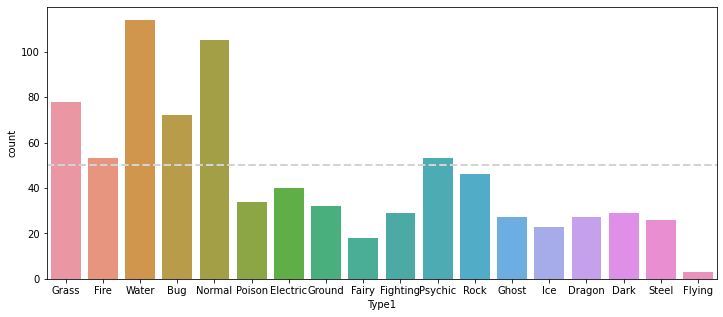

In [ ]:
plt.figure(figsize=(12, 5))
plt.axhline(50, color='lightgray', linestyle='--', linewidth=2)
sns.countplot(x=df["Type1"]);

- Name 중복값 X, 결측치 X
- Type1 결측치 X
- Type2 결측치 O 

In [ ]:
# 데이터(df.Name)에 대소문자 구분이 있는지 확인 => 없음, 다 소문자로 이루어짐
df["Name"][df["Name"].str.contains('A-Z')]

Series([], Name: Name, dtype: object)

In [ ]:
# paths에서 몬스터 이름 구하는 방법
paths[0].split("/")[2].split(".")[0].strip()

'huntail'

In [ ]:
# 새로운 컬럼을 추가 (image_path)
for path in paths:
    po_name = path.split("/")[2].split(".")[0].strip()
    df.loc[df.Name == po_name, "image_path"] = path

In [ ]:
df.head()

,Name,Type1,Type2,image_path
0,bulbasaur,Grass,Poison,images/images/bulbasaur.png
1,ivysaur,Grass,Poison,images/images/ivysaur.png
2,venusaur,Grass,Poison,images/images/venusaur.png
3,charmander,Fire,NaN,images/images/charmander.png
4,charmeleon,Fire,NaN,images/images/charmeleon.png


In [ ]:
df.tail()

,Name,Type1,Type2,image_path
804,stakataka,Rock,Steel,images/images/stakataka.jpg
805,blacephalon,Fire,Ghost,images/images/blacephalon.jpg
806,zeraora,Electric,NaN,images/images/zeraora.jpg
807,meltan,Steel,NaN,images/images/meltan.jpg
808,melmetal,Steel,NaN,images/images/melmetal.jpg


In [ ]:
df.sample(10)

,Name,Type1,Type2,image_path
716,yveltal,Dark,Flying,images/images/yveltal.png
758,stufful,Normal,Fighting,images/images/stufful.jpg
735,grubbin,Bug,NaN,images/images/grubbin.jpg
420,cherrim,Grass,NaN,images/images/cherrim.png
358,absol,Dark,NaN,images/images/absol.png
410,bastiodon,Rock,Steel,images/images/bastiodon.png
628,vullaby,Dark,Flying,images/images/vullaby.png
423,ambipom,Normal,NaN,images/images/ambipom.png
789,cosmoem,Psychic,NaN,images/images/cosmoem.jpg
640,tornadus-incarnate,Flying,NaN,images/images/tornadus-incarnate.png


In [ ]:
df.Type1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
Classes = ["Grass", "Fire", "Water", "Bug", "Normal", "Psychic"]
Classes

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Psychic']

In [ ]:
Type = []
ind = []

for i in range(df.shape[0]):
    if (df.iloc[i]["Type1"]=="Grass") or (df.iloc[i]["Type2"]=="Grass"):
        Type.append("Grass")
        ind.append(1)
    elif (df.iloc[i]["Type1"]=="Fire") or (df.iloc[i]["Type2"]=="Fire"):
        Type.append("Fire")
        ind.append(2)
    elif (df.iloc[i]["Type1"]=="Water") or (df.iloc[i]["Type2"]=="Water"):
        Type.append("Water")
        ind.append(3)
    elif (df.iloc[i]["Type1"]=="Bug") or (df.iloc[i]["Type2"]=="Bug"):
        Type.append("Bug")
        ind.append(4)   
    elif (df.iloc[i]["Type1"]=="Normal") or (df.iloc[i]["Type2"]=="Normal"):
        Type.append("Normal")
        ind.append(5)  
    elif (df.iloc[i]["Type1"]=="Psychic") or (df.iloc[i]["Type2"]=="Psychic"):
        Type.append("Psychic")
        ind.append(6)


    else:
        Type.append('N')
        ind.append('N')

In [ ]:
df["type"] = Type
df["ind"] = ind
data = df.drop(["Type1", "Type2", "Name"], axis=1)
data = data[data["type"]!='N']
data.shape

(525, 3)

In [ ]:
data.head(2)

,image_path,type,ind
0,images/images/bulbasaur.png,Grass,1
1,images/images/ivysaur.png,Grass,1


In [ ]:
data.type.nunique()

6

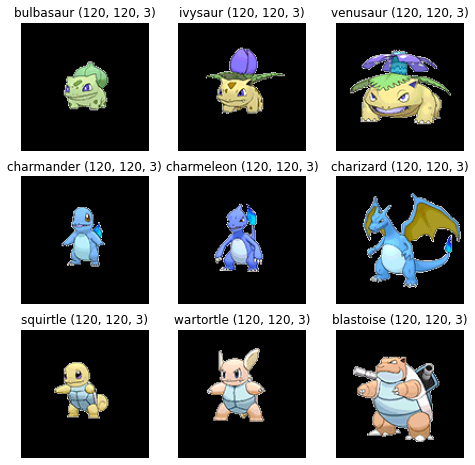

In [ ]:
import cv2

plt.figure(figsize=(8, 8))
for i, images in enumerate(df["image_path"][:9]):
    ax = plt.subplot(3, 3, i + 1)
    img = cv2.imread(images)
    name = df["Name"][i]
    plt.imshow(img)
    plt.title(f'{name} {img.shape}')
    plt.axis("off")

성장과정이 다 담긴 것으로 보임

In [ ]:
def img_read_resize(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (120, 120))
    return img

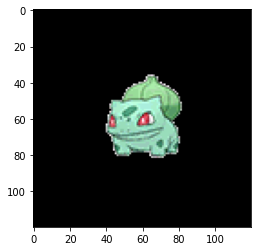

In [ ]:
plt.imshow(img_read_resize(data["image_path"][0]))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rescale=1/255,
#     validation_split=0.2)

In [ ]:
train_datagen = ImageDataGenerator(
    
    rescale=1./255, 
    rotation_range=25, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    data, 
    x_col='image_path', y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    data , x_col='image_path', y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 420 validated image filenames belonging to 6 classes.
Found 105 validated image filenames belonging to 6 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras as ks
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator


model = ks.models.Sequential()

model.add(ks.layers.Dense(128, input_shape=(120, 120, 4)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.BatchNormalization())

model.add(ks.layers.Flatten())

model.add(ks.layers.Dense(128, activation='relu'))

model.add(ks.layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 120, 120, 128)     640       
                                                                 
 batch_normalization_10 (Bat  (None, 120, 120, 128)    512       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 118, 118, 32)      36896     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 59, 59, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 59, 59, 32)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_acc", patience=20, verbose=1)

In [ ]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    epochs=500
)

Epoch 1/500
14/14 [==============================] - 13s 267ms/step - loss: 2.2500 - acc: 0.1738 - val_loss: 1.7885 - val_acc: 0.2000
Epoch 2/500
14/14 [==============================] - 3s 200ms/step - loss: 2.0378 - acc: 0.2381 - val_loss: 1.7762 - val_acc: 0.2571
Epoch 3/500
14/14 [==============================] - 3s 202ms/step - loss: 1.8986 - acc: 0.2524 - val_loss: 1.8703 - val_acc: 0.1810
Epoch 4/500
14/14 [==============================] - 3s 203ms/step - loss: 1.8405 - acc: 0.2976 - val_loss: 1.8560 - val_acc: 0.2095
Epoch 5/500
14/14 [==============================] - 3s 206ms/step - loss: 1.7922 - acc: 0.3095 - val_loss: 1.9305 - val_acc: 0.1238
Epoch 6/500
14/14 [==============================] - 3s 203ms/step - loss: 1.7523 - acc: 0.3381 - val_loss: 1.8528 - val_acc: 0.2095
Epoch 7/500
14/14 [==============================] - 3s 201ms/step - loss: 1.6520 - acc: 0.3667 - val_loss: 1.8632 - val_acc: 0.2190
Epoch 8/500
14/14 [==============================] - 3s 202ms/step -

In [ ]:
model.fit?

In [ ]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,acc,val_loss,val_acc
0,2.250036,0.173810,1.788475,0.200000
1,2.037809,0.238095,1.776216,0.257143
2,1.898551,0.252381,1.870303,0.180952
3,1.840548,0.297619,1.856029,0.209524
4,1.792197,0.309524,1.930516,0.123810
...,...,...,...,...
495,0.578432,0.833333,2.282331,0.457143
496,0.566094,0.816667,2.828986,0.314286
497,0.473253,0.838095,2.610878,0.380952
498,0.379808,0.845238,2.526947,0.419048


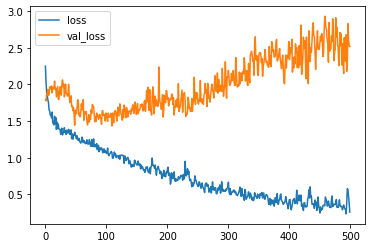

In [ ]:
df_hist[['loss', 'val_loss']].plot()

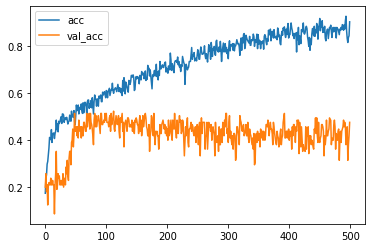

In [ ]:
df_hist[['acc', 'val_acc']].plot()